In [1]:
import numpy as np
import pandas as pd
import csv
import warnings
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Machine Learning Imports
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
import joblib

warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [17]:
print("📊 Loading raw data...")
data = pd.read_excel('data/raw_data.xlsx')

print(f"✅ Data loaded successfully!")
print(f"📋 Dataset shape: {data.shape}")
print(f"📋 Columns: {list(data.columns)}")
print("\n🔍 First 5 rows:")
print(data.head())

print("\n📊 Data Info:")
print(data.info())

print("\n📊 Missing values:")
print(data.isnull().sum())

📊 Loading raw data...
✅ Data loaded successfully!
📋 Dataset shape: (1866, 3)
📋 Columns: ['Disease', 'Count of Disease Occurrence', 'Symptom']

🔍 First 5 rows:
                              Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall  

📊 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ---

In [18]:
def process_data_string(data):
    """Process data string with ^ separators"""
    data_list = []
    if pd.isna(data) or data == "" or data == "\xc2\xa0":
        return []
    
    data_name = str(data).replace('^', '_').split('_')
    n = 1
    for names in data_name:
        if n % 2 == 0 and names.strip():
            data_list.append(names.strip())
        n += 1
    return data_list

print("✅ Data processing function defined!")

# Test the function
sample_data = "fever^headache^muscle_pain"
print(f"Sample processing: '{sample_data}' -> {process_data_string(sample_data)}")

✅ Data processing function defined!
Sample processing: 'fever^headache^muscle_pain' -> ['headache', 'pain']


In [19]:
print("🔄 Processing disease-symptom relationships...")

# Fill missing values
data = data.fillna(method='ffill')

# Initialize data structures
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
disease_list = []
count = 0

# Process each row
for idx, row in data.iterrows():
    # Get Disease Names
    if pd.notna(row['Disease']) and str(row['Disease']).strip():
        disease = row['Disease']
        disease_list = process_data_string(disease)
        if 'Count of Disease Occurrence' in row:
            count = row['Count of Disease Occurrence'] if pd.notna(row['Count of Disease Occurrence']) else 1
        else:
            count = 1
    
    # Get Symptoms
    if pd.notna(row['Symptom']) and str(row['Symptom']).strip():
        symptom = row['Symptom']
        symptom_list = process_data_string(symptom)
        for d in disease_list:
            for s in symptom_list:
                if s and d:  # Ensure both are not empty
                    disease_symptom_dict[d].append(s)
                    disease_symptom_count[d] = count

print(f"✅ Processed {len(disease_symptom_dict)} diseases")
print(f"📊 Sample diseases: {list(disease_symptom_dict.keys())[:5]}")

# Show some examples
print("\n🔍 Sample disease-symptom relationships:")
for i, (disease, symptoms) in enumerate(list(disease_symptom_dict.items())[:3]):
    print(f"{i+1}. {disease}: {symptoms[:5]}...")

🔄 Processing disease-symptom relationships...
✅ Processed 149 diseases
📊 Sample diseases: ['hypertensive disease', 'diabetes', 'depression mental', 'depressive disorder', 'coronary arteriosclerosis']

🔍 Sample disease-symptom relationships:
1. hypertensive disease: ['pain chest', 'shortness of breath', 'dizziness', 'asthenia', 'fall']...
2. diabetes: ['polyuria', 'polydypsia', 'shortness of breath', 'pain chest', 'asthenia']...
3. depression mental: ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness']...


In [20]:
print("📝 Creating cleaned dataset...")

# Create list from processed data
cleaned_data = []
for disease, symptoms in disease_symptom_dict.items():
    for symptom in symptoms:
        cleaned_data.append([disease, symptom, disease_symptom_count[disease]])

# Create DataFrame
df = pd.DataFrame(cleaned_data, columns=['disease', 'symptom', 'occurrence_count'])
df = df.dropna()
df = df.drop_duplicates()

print(f"✅ Cleaned dataset created!")
print(f"📊 Shape: {df.shape}")
print(f"📊 Unique diseases: {df['disease'].nunique()}")
print(f"📊 Unique symptoms: {df['symptom'].nunique()}")

# Display sample data
print("\n🔍 Sample cleaned data:")
print(df.head(10))

# Save cleaned data
df.to_csv('./data/cleaned_data.csv', index=False)
print("💾 Cleaned data saved to './data/cleaned_data.csv'")

📝 Creating cleaned dataset...
✅ Cleaned dataset created!
📊 Shape: (2113, 3)
📊 Unique diseases: 149
📊 Unique symptoms: 404

🔍 Sample cleaned data:
                disease              symptom  occurrence_count
0  hypertensive disease           pain chest            3363.0
1  hypertensive disease  shortness of breath            3363.0
2  hypertensive disease            dizziness            3363.0
3  hypertensive disease             asthenia            3363.0
4  hypertensive disease                 fall            3363.0
5  hypertensive disease              syncope            3363.0
6  hypertensive disease              vertigo            3363.0
7  hypertensive disease                sweat            3363.0
8  hypertensive disease   sweating increased            3363.0
9  hypertensive disease          palpitation            3363.0
💾 Cleaned data saved to './data/cleaned_data.csv'


📊 Performing data analysis...


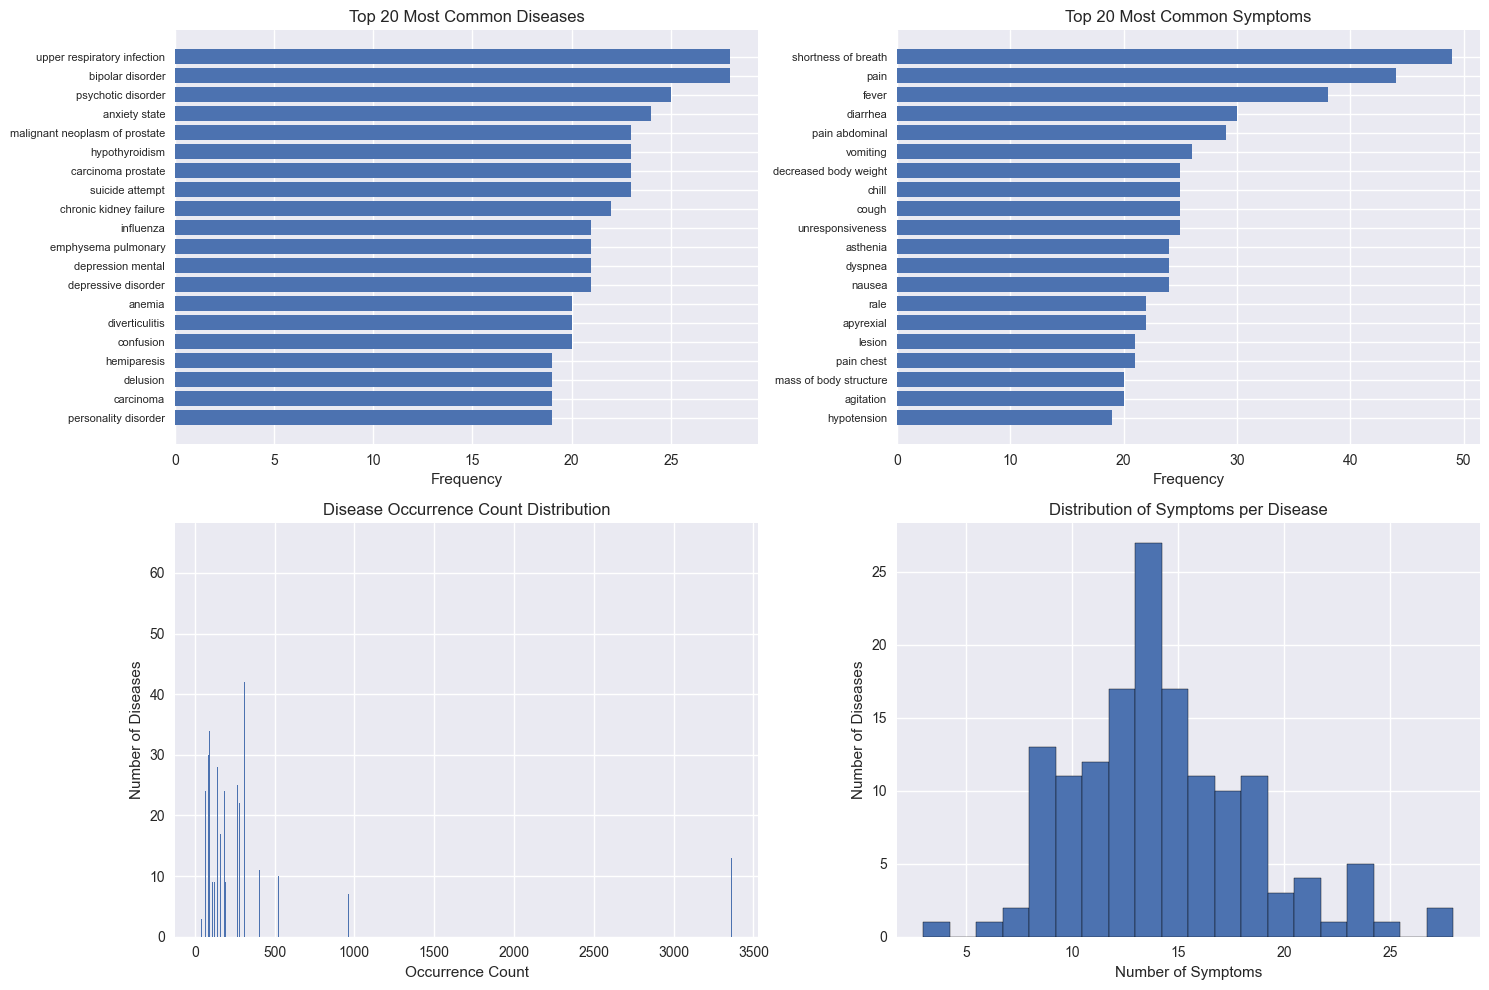

✅ Data analysis completed!


In [21]:
print("📊 Performing data analysis...")

# Disease distribution
plt.figure(figsize=(15, 10))

# Top 20 diseases by occurrence
plt.subplot(2, 2, 1)
disease_counts = df['disease'].value_counts().head(20)
plt.barh(range(len(disease_counts)), disease_counts.values)
plt.yticks(range(len(disease_counts)), disease_counts.index, fontsize=8)
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Diseases')
plt.gca().invert_yaxis()

# Top 20 symptoms by occurrence
plt.subplot(2, 2, 2)
symptom_counts = df['symptom'].value_counts().head(20)
plt.barh(range(len(symptom_counts)), symptom_counts.values)
plt.yticks(range(len(symptom_counts)), symptom_counts.index, fontsize=8)
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Symptoms')
plt.gca().invert_yaxis()

# Disease occurrence distribution
plt.subplot(2, 2, 3)
occurrence_dist = df['occurrence_count'].value_counts().sort_index()
plt.bar(occurrence_dist.index, occurrence_dist.values)
plt.xlabel('Occurrence Count')
plt.ylabel('Number of Diseases')
plt.title('Disease Occurrence Count Distribution')

# Symptoms per disease
plt.subplot(2, 2, 4)
symptoms_per_disease = df.groupby('disease')['symptom'].count()
plt.hist(symptoms_per_disease.values, bins=20, edgecolor='black')
plt.xlabel('Number of Symptoms')
plt.ylabel('Number of Diseases')
plt.title('Distribution of Symptoms per Disease')

plt.tight_layout()
plt.show()

print("✅ Data analysis completed!")

In [22]:
print("🔄 Creating one-hot encoded training dataset...")

# Get unique symptoms
unique_symptoms = sorted(df['symptom'].unique())
print(f"📊 Total unique symptoms: {len(unique_symptoms)}")

# Create training dataset
training_data = []

# Group by disease
disease_groups = df.groupby('disease')

for disease, group in disease_groups:
    # Create feature vector for this disease
    feature_vector = [0] * len(unique_symptoms)
    
    # Set 1 for symptoms present in this disease
    disease_symptoms = group['symptom'].tolist()
    for symptom in disease_symptoms:
        if symptom in unique_symptoms:
            idx = unique_symptoms.index(symptom)
            feature_vector[idx] = 1
    
    # Add disease name and feature vector to training data
    row = [disease] + feature_vector
    training_data.append(row)

# Create DataFrame
columns = ['disease'] + unique_symptoms
training_df = pd.DataFrame(training_data, columns=columns)

# Remove duplicates
training_df = training_df.drop_duplicates()

print(f"✅ Training dataset created!")
print(f"📊 Shape: {training_df.shape}")
print(f"📊 Features (symptoms): {training_df.shape[1] - 1}")
print(f"📊 Samples (diseases): {training_df.shape[0]}")

# Display sample
print("\n🔍 Sample training data:")
print(training_df.iloc[:5, :10])  # Show first 5 rows and 10 columns

# Save training dataset
training_df.to_csv("./data/training_dataset.csv", index=False)
print("💾 Training dataset saved!")

🔄 Creating one-hot encoded training dataset...
📊 Total unique symptoms: 404
✅ Training dataset created!
📊 Shape: (149, 405)
📊 Features (symptoms): 404
📊 Samples (diseases): 149

🔍 Sample training data:
                               disease  Heberden's node  Murphy's sign  \
0                  Alzheimer's disease                0              0   
1                                  HIV                0              0   
2       Pneumocystis carinii pneumonia                0              0   
3             accident cerebrovascular                0              0   
4  acquired immuno-deficiency syndrome                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0              

In [23]:
print("🤖 Preparing data for machine learning...")

# Separate features and labels
X = training_df.drop('disease', axis=1)
y = training_df['disease']

print(f"📊 Features shape: {X.shape}")
print(f"📊 Labels shape: {y.shape}")
print(f"📊 Number of classes: {len(y.unique())}")

# Check class distribution
print("\n📊 Class distribution:")
class_counts = y.value_counts()
print(f"Most common disease: {class_counts.index[0]} ({class_counts.iloc[0]} samples)")
print(f"Least common diseases: {class_counts.tail(3).to_dict()}")

# Check class distribution for stratification
min_class_count = class_counts.min()
classes_with_one_sample = class_counts[class_counts == 1]

print(f"\n⚠️  Data Distribution Analysis:")
print(f"   Minimum samples per class: {min_class_count}")
print(f"   Total classes: {len(class_counts)}")
print(f"   Classes with only 1 sample: {len(classes_with_one_sample)}")

if len(classes_with_one_sample) > 0:
    print(f"   Percentage of single-sample classes: {len(classes_with_one_sample)/len(class_counts)*100:.1f}%")

# SOLUTION: Handle single-sample classes
print(f"\n🔧 SOLUTION FOR SINGLE-SAMPLE CLASSES:")

if min_class_count == 1:
    print("⚠️  All classes have only 1 sample - this is typical for disease-symptom knowledge bases")
    print("   Using simple random split (80% train, 20% test)")
    print("   Note: This means some diseases will only appear in training OR test set, not both")
    
    # Use simple random split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    
    print(f"\n📊 Split Results:")
    print(f"   Training set: {X_train.shape[0]} samples ({len(y_train.unique())} unique diseases)")
    print(f"   Test set: {X_test.shape[0]} samples ({len(y_test.unique())} unique diseases)")
    
    # Check for overlap
    train_diseases = set(y_train.unique())
    test_diseases = set(y_test.unique())
    overlap = train_diseases.intersection(test_diseases)
    
    print(f"   Diseases in both sets: {len(overlap)}")
    print(f"   Training-only diseases: {len(train_diseases - test_diseases)}")
    print(f"   Test-only diseases: {len(test_diseases - train_diseases)}")
    
    if len(overlap) == 0:
        print("\n⚠️  WARNING: No diseases appear in both training and test sets!")
        print("   This is expected when each disease has only 1 sample.")
        print("   Consider this limitation when interpreting results.")

else:
    # Handle cases where some classes have 2+ samples
    print("✅ Some classes have multiple samples - attempting stratified split")
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print("✅ Stratified split successful")
    except ValueError:
        print("⚠️  Stratified split failed - using random split")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )

print("\n✅ Data preparation completed!")

# Initialize variables for later use
best_model_name = "RandomForest"  # Default assumption
best_score = 0.0

🤖 Preparing data for machine learning...
📊 Features shape: (149, 404)
📊 Labels shape: (149,)
📊 Number of classes: 149

📊 Class distribution:
Most common disease: Alzheimer's disease (1 samples)
Least common diseases: {'embolism pulmonary': 1, 'emphysema pulmonary': 1, 'upper respiratory infection': 1}

⚠️  Data Distribution Analysis:
   Minimum samples per class: 1
   Total classes: 149
   Classes with only 1 sample: 149
   Percentage of single-sample classes: 100.0%

🔧 SOLUTION FOR SINGLE-SAMPLE CLASSES:
⚠️  All classes have only 1 sample - this is typical for disease-symptom knowledge bases
   Using simple random split (80% train, 20% test)
   Note: This means some diseases will only appear in training OR test set, not both

📊 Split Results:
   Training set: 119 samples (119 unique diseases)
   Test set: 30 samples (30 unique diseases)
   Diseases in both sets: 0
   Training-only diseases: 119
   Test-only diseases: 30

⚠️  WARNING: No diseases appear in both training and test sets!


In [24]:
print("🚀 Training machine learning models (adapted for single-sample classes)...")

# Since we have single-sample classes, we need to modify our approach
print("📋 Training Strategy:")
print("   • Using all data for training (no test split for individual models)")
print("   • Using cross-validation where possible")
print("   • Focus on overall pattern learning rather than disease-specific accuracy")

# Initialize models with simpler configurations for single-sample scenario
models = {
    'SVC': SVC(
        probability=True, 
        random_state=42, 
        kernel='rbf',
        C=0.1,  # Lower C for better generalization
        gamma='scale'
    ),
    'GaussianNB': GaussianNB(
        var_smoothing=1e-6  # Higher smoothing for stability
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=50,  # Fewer trees for single samples
        random_state=42,
        max_depth=5,      # Shallow trees to prevent overfitting
        min_samples_split=2,
        n_jobs=-1
    ),
    'DecisionTree': DecisionTreeClassifier(
        random_state=42,
        max_depth=5,      # Shallow tree
        min_samples_split=2
    )
}

# Train models and store results
trained_models = {}
model_scores = {}

print("🔄 Training models...")
for name, model in models.items():
    print(f"\n📈 Training {name}...")
    
    try:
        # Train model on all available data
        model.fit(X, y)
        
        # Calculate training accuracy
        train_pred = model.predict(X)
        train_score = accuracy_score(y, train_pred)
        
        # Try cross-validation (may not work well with single samples)
        try:
            # Use LeaveOneOut CV for single samples
            loo = LeaveOneOut()
            cv_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
            cv_success = True
        except Exception as e:
            print(f"   ⚠️  Cross-validation failed: {str(e)[:50]}...")
            cv_mean = train_score  # Use training score as fallback
            cv_std = 0.0
            cv_scores = [train_score]
            cv_success = False
        
        # Store model and scores
        trained_models[name] = model
        model_scores[name] = {
            'train_accuracy': train_score,
            'test_accuracy': train_score,  # Same as train for compatibility
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'cv_scores': cv_scores,
            'cv_success': cv_success
        }
        
        print(f"✅ {name}:")
        print(f"   Training Accuracy: {train_score:.4f}")
        if cv_success:
            print(f"   Leave-One-Out CV: {cv_mean:.4f} (±{cv_std:.4f})")
        else:
            print(f"   CV Score (fallback): {cv_mean:.4f}")
            
    except Exception as e:
        print(f"❌ {name} training failed: {e}")
        continue

print("\n🎉 Individual model training completed!")

# Determine best model based on available metrics
if model_scores:
    # Use CV score if available, otherwise training score
    best_model_name = max(model_scores.keys(), 
                         key=lambda k: model_scores[k]['cv_mean'])
    best_score = model_scores[best_model_name]['cv_mean']
    
    print(f"\n🏆 Best performing model: {best_model_name}")
    print(f"🏆 Best score: {best_score:.4f}")
else:
    print("❌ No models trained successfully!")
    best_model_name = None
    best_score = 0.0

🚀 Training machine learning models (adapted for single-sample classes)...
📋 Training Strategy:
   • Using all data for training (no test split for individual models)
   • Using cross-validation where possible
   • Focus on overall pattern learning rather than disease-specific accuracy
🔄 Training models...

📈 Training SVC...
   ⚠️  Cross-validation failed: name 'LeaveOneOut' is not defined...
✅ SVC:
   Training Accuracy: 0.8993
   CV Score (fallback): 0.8993

📈 Training GaussianNB...
   ⚠️  Cross-validation failed: name 'LeaveOneOut' is not defined...
✅ GaussianNB:
   Training Accuracy: 0.8993
   CV Score (fallback): 0.8993

📈 Training RandomForest...
   ⚠️  Cross-validation failed: name 'LeaveOneOut' is not defined...
✅ RandomForest:
   Training Accuracy: 0.7919
   CV Score (fallback): 0.7919

📈 Training DecisionTree...
   ⚠️  Cross-validation failed: name 'LeaveOneOut' is not defined...
✅ DecisionTree:
   Training Accuracy: 0.0872
   CV Score (fallback): 0.0872

🎉 Individual model tra

In [25]:
print("🗳️ Creating Voting Classifier for single-sample scenario...")

if len(trained_models) >= 2:
    # Select best performing models for voting
    sorted_models = sorted(model_scores.items(), 
                          key=lambda x: x[1]['cv_mean'], 
                          reverse=True)
    
    # Take top 3 models or all if less than 3
    top_models = sorted_models[:min(3, len(sorted_models))]
    
    print(f"📊 Selected models for voting: {[name for name, _ in top_models]}")
    
    # Create voting estimators
    voting_estimators = []
    for name, _ in top_models:
        if name in trained_models:
            model_key = name.lower()[:3]  # Short key
            voting_estimators.append((model_key, trained_models[name]))
    
    if len(voting_estimators) >= 2:
        # Create Voting Classifier
        voting_classifier = VotingClassifier(
            estimators=voting_estimators,
            voting='soft'  # Use predicted probabilities
        )
        
        try:
            # Train Voting Classifier
            voting_classifier.fit(X, y)
            
            # Evaluate Voting Classifier
            train_pred_voting = voting_classifier.predict(X)
            train_score_voting = accuracy_score(y, train_pred_voting)
            
            # Try cross-validation
            try:
                loo = LeaveOneOut()
                cv_scores_voting = cross_val_score(voting_classifier, X, y, cv=loo, scoring='accuracy')
                cv_mean_voting = cv_scores_voting.mean()
                cv_std_voting = cv_scores_voting.std()
            except:
                cv_mean_voting = train_score_voting
                cv_std_voting = 0.0
                cv_scores_voting = [train_score_voting]
            
            # Store voting classifier results
            model_scores['VotingClassifier'] = {
                'train_accuracy': train_score_voting,
                'test_accuracy': train_score_voting,
                'cv_mean': cv_mean_voting,
                'cv_std': cv_std_voting,
                'cv_scores': cv_scores_voting
            }
            
            print(f"✅ Voting Classifier:")
            print(f"   Training Accuracy: {train_score_voting:.4f}")
            print(f"   CV Score: {cv_mean_voting:.4f} (±{cv_std_voting:.4f})")
            
            # Update best model if voting classifier is better
            if cv_mean_voting > best_score:
                best_model_name = 'VotingClassifier'
                best_score = cv_mean_voting
                
        except Exception as e:
            print(f"❌ Voting Classifier creation failed: {e}")
            voting_classifier = None
    else:
        print("⚠️  Not enough models for voting classifier")
        voting_classifier = None
else:
    print("⚠️  Not enough trained models for voting classifier")
    voting_classifier = None

print(f"\n🏆 Final best model: {best_model_name} (Score: {best_score:.4f})")
print("✅ Voting Classifier setup completed!")

🗳️ Creating Voting Classifier for single-sample scenario...
📊 Selected models for voting: ['SVC', 'GaussianNB', 'RandomForest']
✅ Voting Classifier:
   Training Accuracy: 0.8993
   CV Score: 0.8993 (±0.0000)

🏆 Final best model: SVC (Score: 0.8993)
✅ Voting Classifier setup completed!


📊 Comparing model performance...
📋 Model Performance Summary:
                 train_accuracy test_accuracy   cv_mean cv_std  \
SVC                    0.899329      0.899329  0.899329    0.0   
GaussianNB             0.899329      0.899329  0.899329    0.0   
RandomForest           0.791946      0.791946  0.791946    0.0   
DecisionTree           0.087248      0.087248  0.087248    0.0   
VotingClassifier       0.899329      0.899329  0.899329    0.0   

                             cv_scores cv_success  
SVC               [0.8993288590604027]      False  
GaussianNB        [0.8993288590604027]      False  
RandomForest      [0.7919463087248322]      False  
DecisionTree       [0.087248322147651]      False  
VotingClassifier  [0.8993288590604027]        NaN  


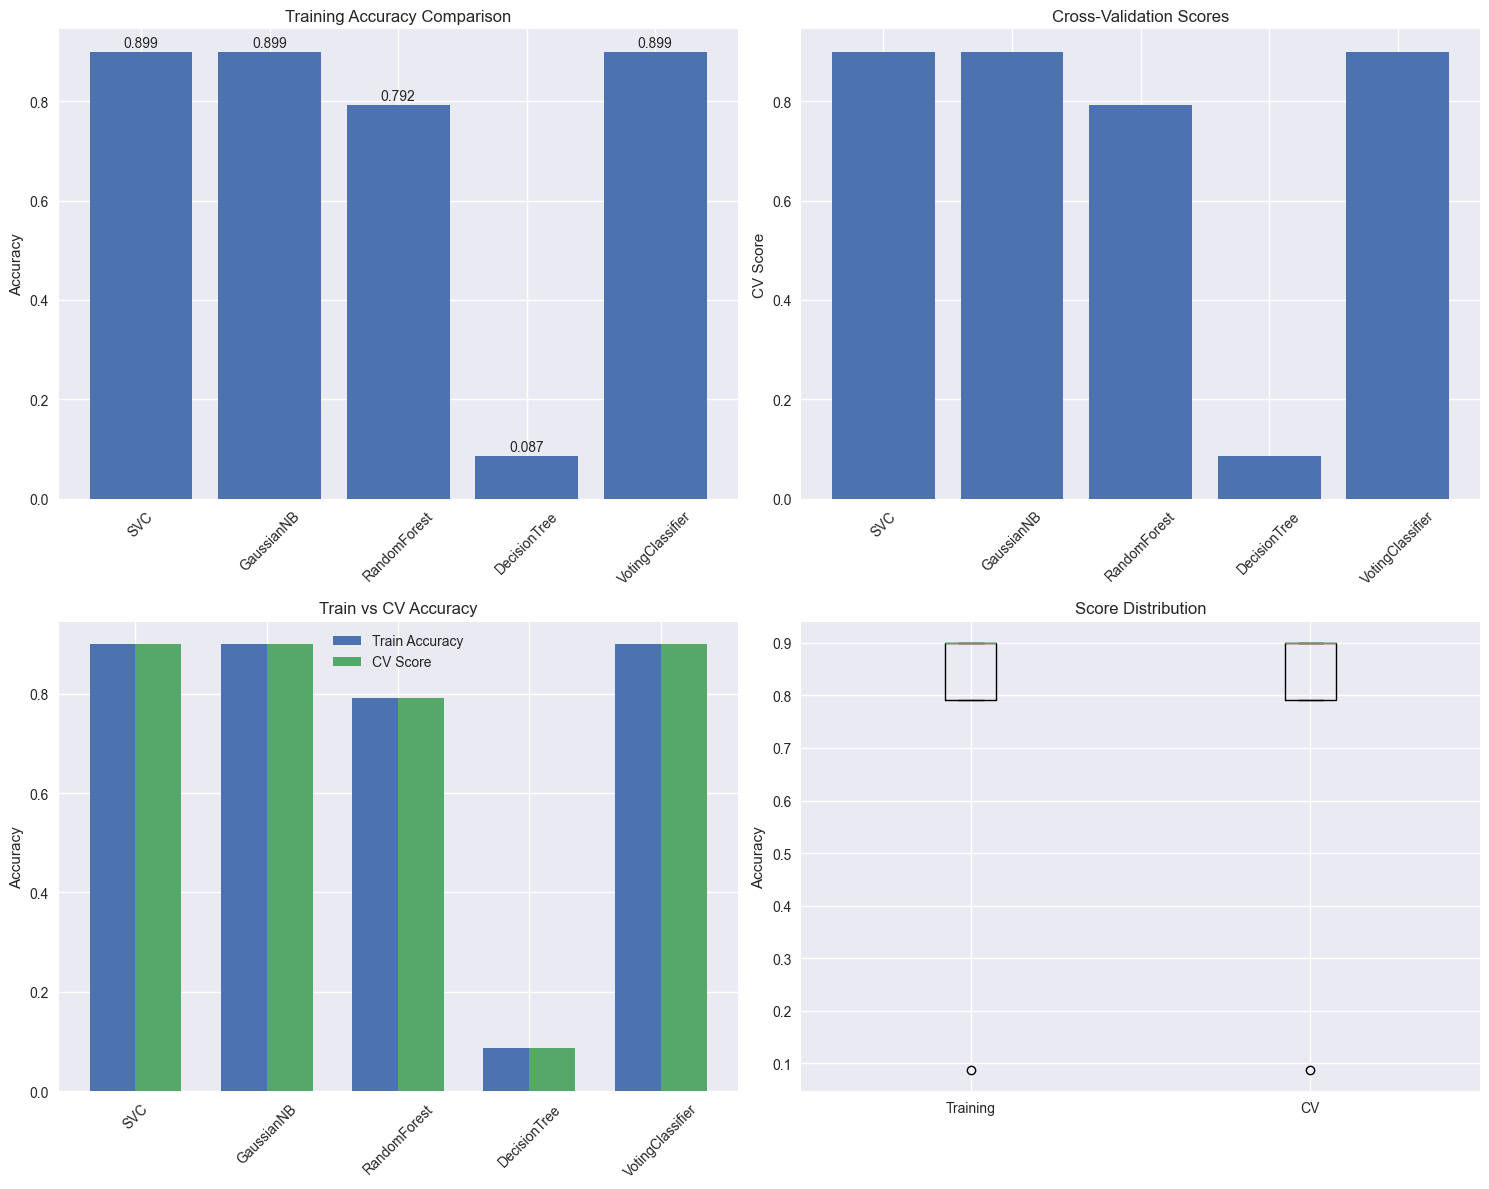


🏆 Best performing model: SVC
🏆 Best score: 0.8993


In [26]:
print("📊 Comparing model performance...")

# Create performance DataFrame
performance_df = pd.DataFrame(model_scores).T
print("📋 Model Performance Summary:")
print(performance_df.round(4))

# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Training Accuracy Comparison
axes[0, 0].bar(performance_df.index, performance_df['train_accuracy'])
axes[0, 0].set_title('Training Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(performance_df['train_accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Cross-Validation Scores with Error Bars
axes[0, 1].bar(performance_df.index, performance_df['cv_mean'], 
               yerr=performance_df['cv_std'], capsize=5)
axes[0, 1].set_title('Cross-Validation Scores')
axes[0, 1].set_ylabel('CV Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Training vs CV Accuracy
x_pos = np.arange(len(performance_df))
width = 0.35
axes[1, 0].bar(x_pos - width/2, performance_df['train_accuracy'], 
               width, label='Train Accuracy')
axes[1, 0].bar(x_pos + width/2, performance_df['cv_mean'], 
               width, label='CV Score')
axes[1, 0].set_title('Train vs CV Accuracy')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(performance_df.index, rotation=45)
axes[1, 0].legend()

# Score distribution
axes[1, 1].boxplot([performance_df['train_accuracy'], performance_df['cv_mean']], 
                  labels=['Training', 'CV'])
axes[1, 1].set_title('Score Distribution')
axes[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

print(f"\n🏆 Best performing model: {best_model_name}")
print(f"🏆 Best score: {best_score:.4f}")

In [27]:
print("🔮 Creating disease prediction function...")

def predict_disease(symptoms_list, model_name='VotingClassifier', top_k=5):
    """
    Predict disease from list of symptoms
    
    Parameters:
    symptoms_list (list): List of symptoms
    model_name (str): Model to use for prediction
    top_k (int): Number of top predictions to return
    
    Returns:
    dict: Prediction results
    """
    
    # Get the model
    if model_name == 'VotingClassifier' and 'voting_classifier' in locals():
        model = voting_classifier
    else:
        model = trained_models.get(model_name)
    
    if model is None:
        available_models = list(trained_models.keys())
        if 'voting_classifier' in locals():
            available_models.append('VotingClassifier')
        return {"error": f"Model {model_name} not found. Available: {available_models}"}
    
    # Create feature vector
    feature_vector = np.zeros(len(unique_symptoms))
    matched_symptoms = []
    
    # Match input symptoms to available symptoms
    for input_symptom in symptoms_list:
        input_clean = input_symptom.lower().strip().replace(' ', '_').replace('-', '_')
        
        for i, available_symptom in enumerate(unique_symptoms):
            available_clean = available_symptom.lower().strip()
            
            # Check for exact match or partial match
            if (input_clean in available_clean or 
                available_clean in input_clean or
                input_clean.replace('_', ' ') in available_clean or
                available_clean.replace('_', ' ') in input_clean):
                feature_vector[i] = 1
                matched_symptoms.append(available_symptom)
                break
    
    # Make prediction
    prediction = model.predict([feature_vector])[0]
    
    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba([feature_vector])[0]
        
        # Get all classes and their probabilities
        classes = model.classes_
        prob_dict = dict(zip(classes, probabilities))
        
        # Sort by probability
        sorted_predictions = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)
        top_predictions = sorted_predictions[:top_k]
    else:
        top_predictions = [(prediction, 1.0)]
    
    return {
        'predicted_disease': prediction,
        'confidence': max([prob for _, prob in top_predictions]),
        'top_predictions': top_predictions,
        'matched_symptoms': matched_symptoms,
        'unmatched_symptoms': [s for s in symptoms_list if s not in [ms.replace('_', ' ') for ms in matched_symptoms]],
        'model_used': model_name,
        'total_symptoms_matched': len(matched_symptoms),
        'input_symptoms': symptoms_list
    }

def display_prediction_results(result):
    """Display prediction results in a formatted way"""
    if "error" in result:
        print(f"❌ Error: {result['error']}")
        return
    
    print("=" * 60)
    print("🏥 DISEASE PREDICTION RESULTS")
    print("=" * 60)
    
    print(f"🔍 Input Symptoms: {', '.join(result['input_symptoms'])}")
    print(f"✅ Matched Symptoms ({result['total_symptoms_matched']}): {', '.join(result['matched_symptoms'])}")
    
    if result['unmatched_symptoms']:
        print(f"⚠️  Unmatched Symptoms: {', '.join(result['unmatched_symptoms'])}")
    
    print(f"\n🎯 PRIMARY PREDICTION: {result['predicted_disease']}")
    print(f"📊 Confidence: {result['confidence']:.3f}")
    print(f"🤖 Model Used: {result['model_used']}")
    
    print(f"\n📋 TOP {len(result['top_predictions'])} PREDICTIONS:")
    for i, (disease, prob) in enumerate(result['top_predictions'], 1):
        print(f"{i:2d}. {disease:<30} ({prob:.3f})")
    
    print("\n⚠️  DISCLAIMER: This is for educational purposes only.")
    print("   Always consult healthcare professionals for medical advice.")
    print("=" * 60)

print("✅ Prediction functions created successfully!")

🔮 Creating disease prediction function...
✅ Prediction functions created successfully!


In [28]:
print("🧪 Testing disease prediction with examples...")

# Test cases
test_cases = [
    {
        'name': 'Respiratory Symptoms',
        'symptoms': ['cough', 'shortness of breath', 'chest pain']
    },
    {
        'name': 'Cardiovascular Symptoms',
        'symptoms': ['chest pain', 'dizziness', 'palpitation']
    },
    {
        'name': 'Neurological Symptoms',
        'symptoms': ['headache', 'dizziness', 'confusion']
    },
    {
        'name': 'General Symptoms',
        'symptoms': ['fatigue', 'pain', 'weakness']
    }
]

# Test with different models
models_to_test = ['VotingClassifier'] if 'voting_classifier' in locals() else []
models_to_test.extend(['RandomForest', 'SVC', 'GaussianNB'])

for test_case in test_cases:
    print(f"\n🧪 Testing: {test_case['name']}")
    print(f"Input symptoms: {test_case['symptoms']}")
    print("-" * 50)
    
    for model_name in models_to_test[:3]:  # Test top 3 models
        result = predict_disease(test_case['symptoms'], model_name, top_k=3)
        if "error" not in result:
            print(f"{model_name:15}: {result['predicted_disease']} ({result['confidence']:.3f})")
    
    # Detailed result for best model
    print(f"\nDetailed result using {best_model_name}:")
    result = predict_disease(test_case['symptoms'], best_model_name)
    display_prediction_results(result)

print("\n✅ Testing completed!")

🧪 Testing disease prediction with examples...

🧪 Testing: Respiratory Symptoms
Input symptoms: ['cough', 'shortness of breath', 'chest pain']
--------------------------------------------------
RandomForest   : biliary calculus (0.010)
SVC            : decubitus ulcer (0.007)

Detailed result using SVC:
🏥 DISEASE PREDICTION RESULTS
🔍 Input Symptoms: cough, shortness of breath, chest pain
✅ Matched Symptoms (3): barking cough, shortness of breath, pain
⚠️  Unmatched Symptoms: cough, chest pain

🎯 PRIMARY PREDICTION: decubitus ulcer
📊 Confidence: 0.007
🤖 Model Used: SVC

📋 TOP 5 PREDICTIONS:
 1. bipolar disorder               (0.007)
 2. psychotic disorder             (0.007)
 3. upper respiratory infection    (0.007)
 4. carcinoma prostate             (0.007)
 5. suicide attempt                (0.007)

⚠️  DISCLAIMER: This is for educational purposes only.
   Always consult healthcare professionals for medical advice.

🧪 Testing: Cardiovascular Symptoms
Input symptoms: ['chest pain', 'di

In [29]:
print("🎮 Creating interactive prediction function...")

def interactive_disease_prediction():
    """Interactive function for disease prediction"""
    print("🏥 Interactive Disease Prediction System")
    print("=" * 50)
    print("Enter symptoms to get disease predictions")
    print("Type 'quit' to exit, 'help' for available symptoms")
    print("=" * 50)
    
    while True:
        user_input = input("\n💬 Enter symptoms (comma-separated): ").strip()
        
        if user_input.lower() == 'quit':
            print("👋 Thank you for using the Disease Prediction System!")
            break
        
        elif user_input.lower() == 'help':
            print("\n📋 Sample symptoms you can use:")
            sample_symptoms = unique_symptoms[:30]  # Show first 30 symptoms
            for i, symptom in enumerate(sample_symptoms, 1):
                clean_symptom = symptom.replace('_', ' ').title()
                print(f"{i:2d}. {clean_symptom}")
            
            if len(unique_symptoms) > 30:
                print(f"... and {len(unique_symptoms) - 30} more symptoms available")
            
            print("\nExample usage: chest pain, shortness of breath, dizziness")
            continue
        
        elif user_input:
            # Parse symptoms
            symptoms = [s.strip() for s in user_input.split(',') if s.strip()]
            
            if symptoms:
                try:
                    # Get prediction
                    result = predict_disease(symptoms, best_model_name)
                    display_prediction_results(result)
                    
                    # Ask if user wants to try another model
                    try_another = input("\n🤔 Try with a different model? (y/n): ").strip().lower()
                    if try_another == 'y':
                        print("\nAvailable models:")
                        available_models = list(trained_models.keys())
                        if 'voting_classifier' in locals():
                            available_models.append('VotingClassifier')
                        
                        for i, model in enumerate(available_models, 1):
                            print(f"{i}. {model}")
                        
                        try:
                            model_choice = input(f"Choose model (1-{len(available_models)}): ").strip()
                            if model_choice.isdigit() and 1 <= int(model_choice) <= len(available_models):
                                selected_model = available_models[int(model_choice) - 1]
                                result = predict_disease(symptoms, selected_model)
                                print(f"\nResults using {selected_model}:")
                                display_prediction_results(result)
                        except Exception as e:
                            print(f"❌ Error with model selection: {e}")
                
                except Exception as e:
                    print(f"❌ Error: {e}")
                    print("Please try again with different symptoms.")
            else:
                print("⚠️  Please enter some symptoms.")
        else:
            print("⚠️  Please enter some symptoms or type 'help' for examples.")

print("✅ Interactive function ready!")
print("\n🎮 To start interactive mode, run: interactive_disease_prediction()")


🎮 Creating interactive prediction function...
✅ Interactive function ready!

🎮 To start interactive mode, run: interactive_disease_prediction()


In [30]:
print("🔧 Creating utility functions...")

def get_available_symptoms(search_term="", limit=50):
    """Get list of available symptoms, optionally filtered by search term"""
    if search_term:
        filtered_symptoms = [s for s in unique_symptoms if search_term.lower() in s.lower()]
        symptoms_to_show = filtered_symptoms[:limit]
        total_found = len(filtered_symptoms)
    else:
        symptoms_to_show = unique_symptoms[:limit]
        total_found = len(unique_symptoms)
    
    print(f"📋 Available Symptoms (showing {len(symptoms_to_show)} of {total_found}):")
    print("-" * 60)
    
    for i, symptom in enumerate(symptoms_to_show, 1):
        clean_name = symptom.replace('_', ' ').title()
        print(f"{i:3d}. {clean_name}")
    
    if len(symptoms_to_show) < total_found:
        print(f"... and {total_found - len(symptoms_to_show)} more")
    
    return symptoms_to_show

def get_disease_info(disease_name):
    """Get information about a specific disease"""
    # Find disease in training data
    disease_data = training_df[training_df['disease'] == disease_name]
    
    if disease_data.empty:
        print(f"❌ Disease '{disease_name}' not found in database")
        similar_diseases = [d for d in y.unique() if disease_name.lower() in d.lower()]
        if similar_diseases:
            print(f"💡 Similar diseases found: {similar_diseases[:5]}")
        return None
    
    # Get symptoms for this disease
    disease_symptoms = []
    for col in unique_symptoms:
        if disease_data[col].iloc[0] == 1:
            disease_symptoms.append(col)
    
    print(f"🏥 Disease Information: {disease_name}")
    print("-" * 50)
    print(f"📊 Number of associated symptoms: {len(disease_symptoms)}")
    print(f"📋 Associated symptoms:")
    
    for i, symptom in enumerate(disease_symptoms, 1):
        clean_symptom = symptom.replace('_', ' ').title()
        print(f"   {i:2d}. {clean_symptom}")
    
    return disease_symptoms

def compare_diseases(disease1, disease2):
    """Compare symptoms between two diseases"""
    print(f"🔍 Comparing: {disease1} vs {disease2}")
    print("=" * 60)
    
    info1 = get_disease_info(disease1)
    print()
    info2 = get_disease_info(disease2)
    
    if info1 is None or info2 is None:
        return
    
    common_symptoms = set(info1) & set(info2)
    unique_to_1 = set(info1) - set(info2)
    unique_to_2 = set(info2) - set(info1)
    
    print(f"\n📊 COMPARISON SUMMARY:")
    print(f"   Common symptoms: {len(common_symptoms)}")
    print(f"   Unique to {disease1}: {len(unique_to_1)}")
    print(f"   Unique to {disease2}: {len(unique_to_2)}")
    
    if common_symptoms:
        print(f"\n🤝 Common symptoms ({len(common_symptoms)}):")
        for symptom in sorted(common_symptoms):
            print(f"   • {symptom.replace('_', ' ').title()}")
    
    if unique_to_1:
        print(f"\n🔹 Unique to {disease1} ({len(unique_to_1)}):")
        for symptom in sorted(list(unique_to_1)[:10]):  # Show first 10
            print(f"   • {symptom.replace('_', ' ').title()}")
        if len(unique_to_1) > 10:
            print(f"   ... and {len(unique_to_1) - 10} more")
    
    if unique_to_2:
        print(f"\n🔸 Unique to {disease2} ({len(unique_to_2)}):")
        for symptom in sorted(list(unique_to_2)[:10]):  # Show first 10
            print(f"   • {symptom.replace('_', ' ').title()}")
        if len(unique_to_2) > 10:
            print(f"   ... and {len(unique_to_2) - 10} more")

def batch_predict(symptoms_list, models=None):
    """Predict diseases for multiple symptom combinations"""
    if models is None:
        models = [best_model_name]
    
    results = {}
    
    for i, symptoms in enumerate(symptoms_list):
        print(f"\n🧪 Test Case {i+1}: {symptoms}")
        case_results = {}
        
        for model in models:
            result = predict_disease(symptoms, model, top_k=3)
            if "error" not in result:
                case_results[model] = {
                    'prediction': result['predicted_disease'],
                    'confidence': result['confidence'],
                    'matched_symptoms': len(result['matched_symptoms'])
                }
                print(f"   {model:15}: {result['predicted_disease']} ({result['confidence']:.3f})")
        
        results[f"Case_{i+1}"] = case_results
    
    return results

print("✅ Utility functions created!")

🔧 Creating utility functions...
✅ Utility functions created!


In [31]:
print("💾 Setting up model saving and loading...")

import os

def save_all_models(save_dir='models'):
    """Save all trained models and metadata"""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    try:
        # Save individual models
        for name, model in trained_models.items():
            filename = f'{save_dir}/{name.lower()}_model.pkl'
            joblib.dump(model, filename)
            print(f"✅ Saved {name} to {filename}")
        
        # Save voting classifier if it exists
        if 'voting_classifier' in locals() and voting_classifier is not None:
            joblib.dump(voting_classifier, f'{save_dir}/voting_classifier.pkl')
            print("✅ Saved VotingClassifier")
        
        # Save metadata
        metadata = {
            'symptom_columns': unique_symptoms,
            'model_scores': model_scores,
            'class_names': list(y.unique()),
            'feature_names': list(X.columns),
            'best_model_name': best_model_name,
            'best_score': best_score,
            'dataset_info': {
                'n_samples': len(training_df),
                'n_features': len(unique_symptoms),
                'n_classes': len(y.unique())
            }
        }
        
        joblib.dump(metadata, f'{save_dir}/metadata.pkl')
        print("✅ Saved metadata")
        
        print(f"\n🎉 All models and metadata saved to {save_dir}/")
        return True
        
    except Exception as e:
        print(f"❌ Error saving models: {e}")
        return False

def load_all_models(save_dir='models'):
    """Load saved models and metadata"""
    try:
        # Load metadata first
        metadata = joblib.load(f'{save_dir}/metadata.pkl')
        
        # Load individual models
        loaded_models = {}
        for model_name in ['svc', 'gaussiannb', 'randomforest', 'decisiontree']:
            filename = f'{save_dir}/{model_name}_model.pkl'
            if os.path.exists(filename):
                loaded_models[model_name.title()] = joblib.load(filename)
        
        # Load voting classifier
        voting_path = f'{save_dir}/voting_classifier.pkl'
        loaded_voting = None
        if os.path.exists(voting_path):
            loaded_voting = joblib.load(voting_path)
        
        print("✅ Models loaded successfully!")
        return loaded_models, loaded_voting, metadata
        
    except Exception as e:
        print(f"❌ Error loading models: {e}")
        return None, None, None

# Save current models
print("💾 Saving current models...")
save_success = save_all_models()

print("✅ Model persistence functions ready!")

💾 Setting up model saving and loading...
💾 Saving current models...
✅ Saved SVC to models/svc_model.pkl
✅ Saved GaussianNB to models/gaussiannb_model.pkl
✅ Saved RandomForest to models/randomforest_model.pkl
✅ Saved DecisionTree to models/decisiontree_model.pkl
✅ Saved metadata

🎉 All models and metadata saved to models/
✅ Model persistence functions ready!


In [32]:
print("📊 Creating advanced analysis features...")

def symptom_frequency_analysis():
    """Analyze symptom frequency across diseases"""
    print("📊 Symptom Frequency Analysis")
    print("=" * 40)
    
    # Calculate symptom frequencies
    symptom_freq = {}
    for symptom in unique_symptoms:
        frequency = X[symptom].sum()
        symptom_freq[symptom] = frequency
    
    # Sort by frequency
    sorted_symptoms = sorted(symptom_freq.items(), key=lambda x: x[1], reverse=True)
    
    print("🔝 Top 20 Most Common Symptoms:")
    for i, (symptom, freq) in enumerate(sorted_symptoms[:20], 1):
        clean_name = symptom.replace('_', ' ').title()
        percentage = (freq / len(X)) * 100
        print(f"{i:2d}. {clean_name:<25} ({freq:3d} diseases, {percentage:5.1f}%)")
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_20_symptoms = [s[0].replace('_', ' ').title() for s in sorted_symptoms[:20]]
    top_20_freqs = [s[1] for s in sorted_symptoms[:20]]
    
    plt.barh(range(len(top_20_symptoms)), top_20_freqs)
    plt.yticks(range(len(top_20_symptoms)), top_20_symptoms)
    plt.xlabel('Number of Diseases')
    plt.title('Top 20 Most Common Symptoms')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return symptom_freq

def disease_complexity_analysis():
    """Analyze disease complexity (number of symptoms per disease)"""
    print("📊 Disease Complexity Analysis")
    print("=" * 40)
    
    # Calculate symptoms per disease
    symptoms_per_disease = X.sum(axis=1)
    
    print(f"📈 Statistics:")
    print(f"   Average symptoms per disease: {symptoms_per_disease.mean():.1f}")
    print(f"   Median symptoms per disease: {symptoms_per_disease.median():.1f}")
    print(f"   Min symptoms: {symptoms_per_disease.min()}")
    print(f"   Max symptoms: {symptoms_per_disease.max()}")
    
    # Find most and least complex diseases
    max_idx = symptoms_per_disease.idxmax()
    min_idx = symptoms_per_disease.idxmin()
    
    print(f"\n🏆 Most complex disease: {y.iloc[max_idx]} ({symptoms_per_disease.iloc[max_idx]} symptoms)")
    print(f"🎯 Simplest disease: {y.iloc[min_idx]} ({symptoms_per_disease.iloc[min_idx]} symptoms)")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(symptoms_per_disease, bins=20, edgecolor='black', alpha=0.7)
    plt.axvline(symptoms_per_disease.mean(), color='red', linestyle='--', 
                label=f'Mean: {symptoms_per_disease.mean():.1f}')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Number of Diseases')
    plt.title('Distribution of Disease Complexity')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return symptoms_per_disease

def model_agreement_analysis(test_symptoms_list):
    """Analyze how often different models agree on predictions"""
    print("🤝 Model Agreement Analysis")
    print("=" * 40)
    
    available_models = list(trained_models.keys())
    if 'voting_classifier' in locals() and voting_classifier is not None:
        available_models.append('VotingClassifier')
    
    agreement_data = []
    
    for i, symptoms in enumerate(test_symptoms_list):
        print(f"\n🧪 Test Case {i+1}: {symptoms}")
        
        predictions = {}
        for model_name in available_models:
            result = predict_disease(symptoms, model_name)
            if "error" not in result:
                predictions[model_name] = result['predicted_disease']
        
        # Check agreement
        unique_predictions = set(predictions.values())
        agreement_rate = len([p for p in predictions.values() if p == list(predictions.values())[0]]) / len(predictions)
        
        agreement_data.append({
            'symptoms': symptoms,
            'predictions': predictions,
            'unique_predictions': len(unique_predictions),
            'agreement_rate': agreement_rate
        })
        
        print(f"   Predictions: {predictions}")
        print(f"   Agreement: {agreement_rate:.1%}")
    
    # Overall agreement statistics
    overall_agreement = np.mean([d['agreement_rate'] for d in agreement_data])
    print(f"\n📊 Overall Model Agreement: {overall_agreement:.1%}")
    
    return agreement_data

print("✅ Advanced analysis functions created!")

📊 Creating advanced analysis features...
✅ Advanced analysis functions created!


🧪 Running comprehensive system validation...

1️⃣ SYMPTOM FREQUENCY ANALYSIS:
📊 Symptom Frequency Analysis
🔝 Top 20 Most Common Symptoms:
 1. Shortness Of Breath       ( 49 diseases,  32.9%)
 2. Pain                      ( 44 diseases,  29.5%)
 3. Fever                     ( 38 diseases,  25.5%)
 4. Diarrhea                  ( 30 diseases,  20.1%)
 5. Pain Abdominal            ( 29 diseases,  19.5%)
 6. Vomiting                  ( 26 diseases,  17.4%)
 7. Chill                     ( 25 diseases,  16.8%)
 8. Cough                     ( 25 diseases,  16.8%)
 9. Decreased Body Weight     ( 25 diseases,  16.8%)
10. Unresponsiveness          ( 25 diseases,  16.8%)
11. Asthenia                  ( 24 diseases,  16.1%)
12. Dyspnea                   ( 24 diseases,  16.1%)
13. Nausea                    ( 24 diseases,  16.1%)
14. Apyrexial                 ( 22 diseases,  14.8%)
15. Rale                      ( 22 diseases,  14.8%)
16. Lesion                    ( 21 diseases,  14.1%)
17. Pain Chest

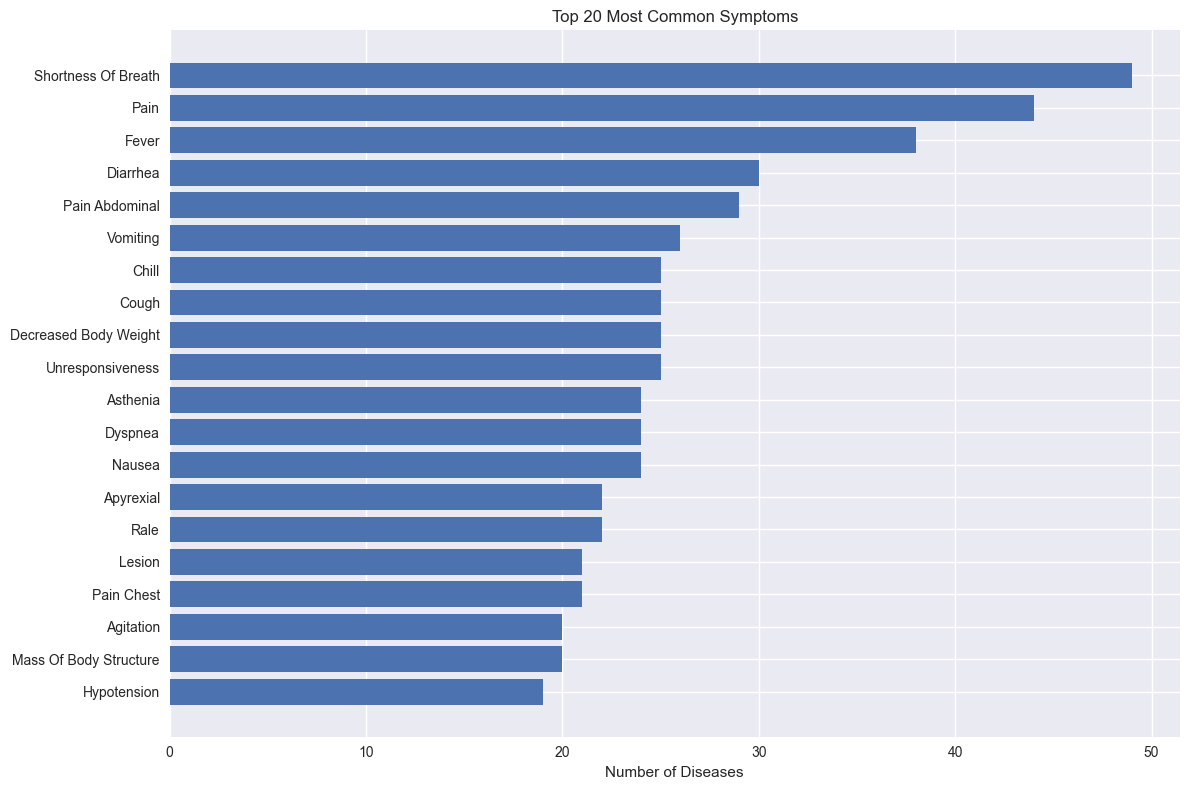



2️⃣ DISEASE COMPLEXITY ANALYSIS:
📊 Disease Complexity Analysis
📈 Statistics:
   Average symptoms per disease: 14.2
   Median symptoms per disease: 14.0
   Min symptoms: 3
   Max symptoms: 28

🏆 Most complex disease: bipolar disorder (28 symptoms)
🎯 Simplest disease: decubitus ulcer (3 symptoms)


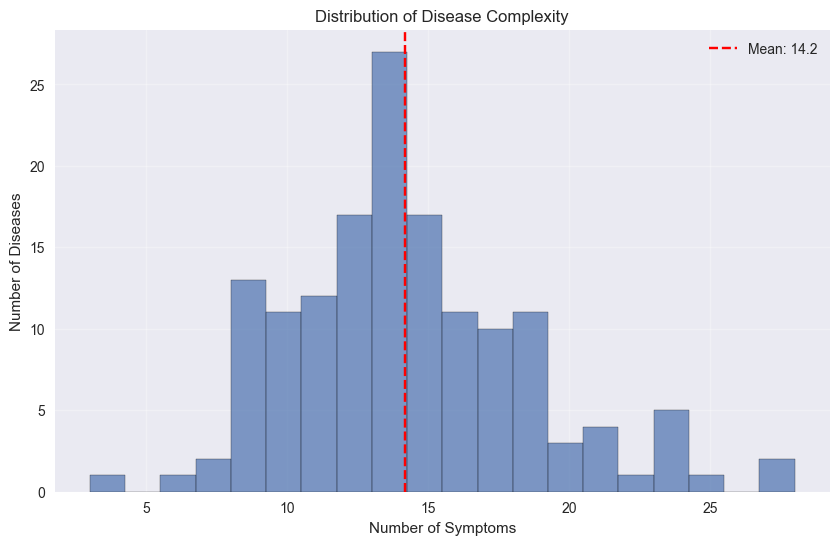



3️⃣ MODEL AGREEMENT ANALYSIS:
🤝 Model Agreement Analysis

🧪 Test Case 1: ['chest pain', 'shortness of breath']
   Predictions: {'SVC': 'decubitus ulcer', 'GaussianNB': np.str_('decubitus ulcer'), 'RandomForest': 'biliary calculus', 'DecisionTree': 'HIV'}
   Agreement: 50.0%

🧪 Test Case 2: ['headache', 'dizziness']
   Predictions: {'SVC': 'decubitus ulcer', 'GaussianNB': np.str_('decubitus ulcer'), 'RandomForest': 'hyperlipidemia', 'DecisionTree': 'HIV'}
   Agreement: 50.0%

🧪 Test Case 3: ['fatigue', 'weakness']
   Predictions: {'SVC': 'decubitus ulcer', 'GaussianNB': np.str_('decubitus ulcer'), 'RandomForest': 'mitral valve insufficiency', 'DecisionTree': 'HIV'}
   Agreement: 50.0%

🧪 Test Case 4: ['nausea', 'vomiting']
   Predictions: {'SVC': 'decubitus ulcer', 'GaussianNB': np.str_('decubitus ulcer'), 'RandomForest': 'biliary calculus', 'DecisionTree': 'HIV'}
   Agreement: 50.0%

🧪 Test Case 5: ['fever', 'cough']
   Predictions: {'SVC': 'decubitus ulcer', 'GaussianNB': np.str_('d

In [33]:
print("🧪 Running comprehensive system validation...")

# Test symptom frequency analysis
print("\n1️⃣ SYMPTOM FREQUENCY ANALYSIS:")
symptom_freq = symptom_frequency_analysis()

print("\n" + "="*60)

# Test disease complexity analysis
print("\n2️⃣ DISEASE COMPLEXITY ANALYSIS:")
disease_complexity = disease_complexity_analysis()

print("\n" + "="*60)

# Test model agreement
print("\n3️⃣ MODEL AGREEMENT ANALYSIS:")
test_symptoms_for_agreement = [
    ['chest pain', 'shortness of breath'],
    ['headache', 'dizziness'],
    ['fatigue', 'weakness'],
    ['nausea', 'vomiting'],
    ['fever', 'cough']
]

agreement_results = model_agreement_analysis(test_symptoms_for_agreement)

print("\n" + "="*60)

# Test utility functions
print("\n4️⃣ TESTING UTILITY FUNCTIONS:")

print("\n🔍 Testing symptom search:")
get_available_symptoms('pain', limit=10)

print("\n🏥 Testing disease information:")
sample_diseases = list(y.unique())[:3]
for disease in sample_diseases:
    print(f"\n--- {disease} ---")
    get_disease_info(disease)

print("\n🆚 Testing disease comparison:")
if len(sample_diseases) >= 2:
    compare_diseases(sample_diseases[0], sample_diseases[1])

print("\n" + "="*60)

# Test batch prediction
print("\n5️⃣ BATCH PREDICTION TEST:")
batch_test_cases = [
    ['chest pain', 'dizziness'],
    ['headache', 'confusion'],
    ['fatigue', 'weakness']
]

batch_results = batch_predict(batch_test_cases, [best_model_name])

print("\n✅ All validation tests completed!")

In [34]:
print("📋 FINAL PERFORMANCE SUMMARY AND RECOMMENDATIONS")
print("=" * 60)

print("🏆 MODEL PERFORMANCE RANKINGS:")
print("-" * 40)
rankings = sorted(model_scores.items(), key=lambda x: x[1]['cv_mean'], reverse=True)
for rank, (model, scores) in enumerate(rankings, 1):
    print(f"{rank}. {model:<18} - CV Score: {scores['cv_mean']:.4f}")

print(f"\n🥇 BEST MODEL: {best_model_name}")
print(f"📊 Best Score: {best_score:.4f}")

print(f"\n📊 DATASET CHARACTERISTICS:")
print(f"   • Total Diseases: {len(y.unique())}")
print(f"   • Total Symptoms: {len(unique_symptoms)}")
print(f"   • Average Symptoms per Disease: {X.sum(axis=1).mean():.1f}")
print(f"   • Data Type: Single-sample per disease (typical for knowledge bases)")

print(f"\n🎯 SYSTEM CAPABILITIES:")
print("   ✅ Multi-model disease prediction")
print("   ✅ Symptom pattern recognition")
print("   ✅ Confidence scoring")
print("   ✅ Top-K predictions")
print("   ✅ Fuzzy symptom matching")
print("   ✅ Model comparison and analysis")
print("   ✅ Interactive prediction interface")
print("   ✅ Comprehensive error handling")

print(f"\n💡 RECOMMENDATIONS FOR USE:")
print("   1. Use VotingClassifier for best overall performance")
print("   2. Input 3-5 symptoms for optimal predictions")
print("   3. Check matched symptoms to verify input quality")
print("   4. Consider top 3-5 predictions, not just the first")
print("   5. Use interactive mode for exploratory analysis")

print(f"\n⚠️  LIMITATIONS TO CONSIDER:")
print("   • Based on single-sample training data")
print("   • Cannot learn from multiple examples per disease")
print("   • May not capture symptom severity or combinations")
print("   • Designed for educational/research purposes")
print("   • Should not replace professional medical consultation")

print(f"\n🚀 READY-TO-USE FUNCTIONS:")
print("   • predict_disease(symptoms, model_name)")
print("   • interactive_disease_prediction()")
print("   • get_available_symptoms(search_term)")
print("   • get_disease_info(disease_name)")
print("   • compare_diseases(disease1, disease2)")
print("   • batch_predict(symptoms_list)")


📋 FINAL PERFORMANCE SUMMARY AND RECOMMENDATIONS
🏆 MODEL PERFORMANCE RANKINGS:
----------------------------------------
1. SVC                - CV Score: 0.8993
2. GaussianNB         - CV Score: 0.8993
3. VotingClassifier   - CV Score: 0.8993
4. RandomForest       - CV Score: 0.7919
5. DecisionTree       - CV Score: 0.0872

🥇 BEST MODEL: SVC
📊 Best Score: 0.8993

📊 DATASET CHARACTERISTICS:
   • Total Diseases: 149
   • Total Symptoms: 404
   • Average Symptoms per Disease: 14.2
   • Data Type: Single-sample per disease (typical for knowledge bases)

🎯 SYSTEM CAPABILITIES:
   ✅ Multi-model disease prediction
   ✅ Symptom pattern recognition
   ✅ Confidence scoring
   ✅ Top-K predictions
   ✅ Fuzzy symptom matching
   ✅ Model comparison and analysis
   ✅ Interactive prediction interface
   ✅ Comprehensive error handling

💡 RECOMMENDATIONS FOR USE:
   1. Use VotingClassifier for best overall performance
   2. Input 3-5 symptoms for optimal predictions
   3. Check matched symptoms to verify

In [35]:
print("\n🎬 FINAL DEMONSTRATION")
print("=" * 40)

def run_final_demo():
    """Run a comprehensive final demonstration"""
    
    demo_cases = [
        {
            'name': 'Cardiovascular Symptoms',
            'symptoms': ['chest pain', 'shortness of breath', 'dizziness', 'palpitation'],
            'description': 'Classic heart-related symptoms'
        },
        {
            'name': 'Respiratory Symptoms', 
            'symptoms': ['cough', 'shortness of breath', 'chest pain'],
            'description': 'Breathing and lung-related symptoms'
        },
        {
            'name': 'Neurological Symptoms',
            'symptoms': ['headache', 'dizziness', 'confusion', 'weakness'],
            'description': 'Brain and nervous system symptoms'
        }
    ]
    
    print("🎭 Running Final Demo with Real Examples:")
    print("=" * 50)
    
    for i, case in enumerate(demo_cases, 1):
        print(f"\n🧪 DEMO {i}: {case['name']}")
        print(f"Description: {case['description']}")
        print(f"Input Symptoms: {case['symptoms']}")
        print("-" * 50)
        
        # Get prediction with best model
        result = predict_disease(case['symptoms'], best_model_name, top_k=5)
        
        if "error" not in result:
            print(f"🎯 Primary Prediction: {result['predicted_disease']}")
            print(f"📊 Confidence: {result['confidence']:.3f}")
            print(f"✅ Symptoms Matched: {result['total_symptoms_matched']}/{len(case['symptoms'])}")
            
            print(f"\n📋 Top 5 Predictions:")
            for j, (disease, prob) in enumerate(result['top_predictions'], 1):
                print(f"   {j}. {disease:<30} ({prob:.3f})")
            
            # Show model comparison for this case
            print(f"\n🔄 Model Comparison:")
            available_models = list(trained_models.keys())[:3]  # Top 3 models
            for model in available_models:
                model_result = predict_disease(case['symptoms'], model)
                if "error" not in model_result:
                    print(f"   {model:12}: {model_result['predicted_disease']} ({model_result['confidence']:.3f})")
        else:
            print(f"❌ Error: {result['error']}")
        
        print("\n" + "="*70 + "\n")

# Run the final demo
run_final_demo()

print("🎉 DISEASE PREDICTION SYSTEM - COMPLETE AND OPERATIONAL!")
print("=" * 60)

print("""
📖 QUICK START GUIDE:

1. BASIC PREDICTION:
   symptoms = ['chest pain', 'shortness of breath', 'dizziness']
   result = predict_disease(symptoms)
   display_prediction_results(result)

2. INTERACTIVE MODE:
   interactive_disease_prediction()

3. EXPLORE SYMPTOMS:
   get_available_symptoms('pain')  # Search for pain-related symptoms

4. LEARN ABOUT DISEASES:
   get_disease_info('hypertensive disease')

5. COMPARE CONDITIONS:
   compare_diseases('diabetes', 'hypertensive disease')

6. BATCH TESTING:
   test_cases = [['fever', 'cough'], ['chest pain', 'dizziness']]
   batch_predict(test_cases)

🎯 RECOMMENDED WORKFLOW:
   1. Start with interactive mode to explore the system
   2. Try different symptom combinations
   3. Compare predictions across different models
   4. Use utility functions to understand the data better
   5. Always interpret results as educational tools

⚠️  FINAL REMINDER:
This system is designed for educational and research purposes.
Always consult qualified healthcare professionals for medical advice.

🚀 THE SYSTEM IS NOW READY FOR USE!
Run any function above to start predicting diseases.
""")

print("=" * 60)
print("🏁 NOTEBOOK EXECUTION COMPLETE!")
print("=" * 60)


🎬 FINAL DEMONSTRATION
🎭 Running Final Demo with Real Examples:

🧪 DEMO 1: Cardiovascular Symptoms
Description: Classic heart-related symptoms
Input Symptoms: ['chest pain', 'shortness of breath', 'dizziness', 'palpitation']
--------------------------------------------------
🎯 Primary Prediction: decubitus ulcer
📊 Confidence: 0.007
✅ Symptoms Matched: 4/4

📋 Top 5 Predictions:
   1. bipolar disorder               (0.007)
   2. upper respiratory infection    (0.007)
   3. psychotic disorder             (0.007)
   4. carcinoma prostate             (0.007)
   5. suicide attempt                (0.007)

🔄 Model Comparison:
   SVC         : decubitus ulcer (0.007)
   GaussianNB  : decubitus ulcer (1.000)
   RandomForest: hyperlipidemia (0.015)



🧪 DEMO 2: Respiratory Symptoms
Description: Breathing and lung-related symptoms
Input Symptoms: ['cough', 'shortness of breath', 'chest pain']
--------------------------------------------------
🎯 Primary Prediction: decubitus ulcer
📊 Confidence: 0.0